## Mahmoud Emara

### Mini Jupyter Exercise 2

### Generation of Dataset 1
##### Create a matrix  ** A ** ∈ $ \mathbb{R}^{3\times2} $ whose individual entries are drawn from a Gaussian distribution with mean 0 and variance 1 in an independent and identically distributed (iid) fashion.

In [82]:
import numpy as num
import random as rand
from numpy.linalg import matrix_rank

mean = 0
var = 1
A = num.random.normal(mean, var, (3,2)) # Setting A as 3x2 matrix
print("Rank of A: ", matrix_rank(A)) # Printing rank of A
print(A)


Rank of A:  2
[[ 1.40537995 -0.46522023]
 [ 1.59484577 -1.11328674]
 [-0.06111594 -2.62464794]]


Generate 500 data samples ${(x_i)}^{500}_{i=1}$ using the aforementioned mathematical model.

In [2]:
v = num.random.normal(mean, var, (2,500))
x = num.matmul(A,v) # Multiplying A and v together
    
#print(x)

X = num.array(x)  # Puts element of x into a matrix X.
print(X.shape) #Prints dimensions of X
print(matrix_rank(X))


(3, 500)
2


#### Singular Vlaue and Eigenvalue Decomposition of Dataset #1
##### Compute the singular value decomposition of X and the eigenvalue decomposition of XXT and verify:

The left singular vectors of X correspond to the eigenvectors of XXT
The eigenvalues of XXT are square of the singular values of X.
The energy in X, defined by kXk2F, is equal to the sum of squares of the singular values of X.

In [60]:
from scipy.linalg import svd
from scipy.linalg import eig

U,Sig,Vt = num.linalg.svd(X) # Using SVD function to get the respective matrixes

print("U: ", U) # Left singular vectors of X
#print(U.shape)
#print(Sig.shape)
#print(Vt.shape)

XXT = num.matmul(X,X.transpose())
eigenvalues, eigenvectors = num.linalg.eig(XXT)
eigVecstr = "Eigenvectors: "
eigValstr = "Eigenvalues: "
print(eigVecstr, eigenvectors)
print(eigValstr, eigenvalues)
# Printing the eigenvalues and eigenvectors of XXT. 

energy = 0
for row in X:
    squares_of_rows = [i**2 for i in row] 
# Energy defined as sum of squares of the singular valeus of X.

singVals = [i**2 for i in Sig]
sumSig = sum(singVals)
print("SumSig: ", sumSig) # Verifying energy = sum of squares of sing. val of X
print("Energy: ", energy)


U:  [[-0.47770787  0.85550451  0.1997679 ]
 [-0.87483816 -0.44245158 -0.19721763]
 [-0.08033295 -0.268977    0.9597906 ]]
(3, 3)
(3,)
(500, 500)
Eigenvectors:  [[ 0.47770787  0.85550451  0.1997679 ]
 [ 0.87483816 -0.44245158 -0.19721763]
 [ 0.08033295 -0.268977    0.9597906 ]]
Eigenvalues:  [ 4.35399846e+03  2.98843629e+02 -6.26727419e-14]
SumSig:  4652.842092164563
Energy:  4652.842092164563


##### Since the rank of $ \textbf{X} $ is 2, it means that the entire dataset spans only a two-dimensional space in $ \mathbb{R}^{3} $

##### Since rank of $ \textbf{X} $ is 2, we should ideally only have two nonzero singular values of $ \textbf{X} $. However, unless you are really lucky, you will see that none of your singular values are exactly zero.

They are not zero because it is a precision error, no matter how small (one of my random values came to be -4.73997540e-14).

#### PCA of Dataset #1
##### 1.) Since each data sample $x_i $ lies in a three-dimensional space, we can have up to three principal components of this data. However, based on your knowledge of how the data was created (and subsequent discussion above), how many principal components should be enough to capture all variation in the data? Justify your answer as much as you can.

There are 2 principal components to capture all variation in the data. There are technically 3 components but the third one is very small, and does not pose much variation in the data.

##### 2.) While $\textit{mean}$ centering is an important preprocessing step for PCA, we do not necessarily need to carry out mean centering in this problem since the mean vector will have small entries. Indeed, if we let $x_1$, $x_2$, and $x_3$ denote the first, second, and third component of the random vector x then it follows that $ \mathbb{E}[x_k] $ = 0, $k$ = 1, 2, 3.

$x_1$, $x_2$, $x_3$ are values in a matrix that are iid. The Gaussian distribution is with mean 0 and variance 1. The expected value is the same as the mean. Therefore, for all $x_i$, the expected value: $\mathbb{E}[x_i] = 0$

In [4]:
meanPrinc = [];
for i in range(len(X)):
    compute = sum(X[i])/len(X[i])
    meanPrinc.append(compute)

print(meanPrinc) # Values printed are small, approximately zero.
m = num.array(meanPrinc)
m.reshape(3,1)
# Values do resemble the expectation of x_i

[-0.07007737849951151, -0.025206061531214227, 0.009406355158409518]


array([[-0.07007738],
       [-0.02520606],
       [ 0.00940636]])

##### 3. Compute the top two principal components $U = [u_1\;u_2]$ of this dataset and print them.

In [5]:
print("U: ",U), print()
topU = [];
princU = [];
large = 0
for i in range(len(U)):
    for j in range(len(U)-1):
        U[i,:].sort()
        if U[i][j] > U[i][j+1]:
            large = U[i][j]
        else:
            large = U[i][j+1]
    topU.append(large)
    large = 0
# Making a double for-loop to run through the U matrix. Here we take each row 
# separately and sort it. We take the largest number of each row and store them
# into a separate list (topU).

print("Top each row: ",topU), print()
topU.sort()
for i in range(len(topU)-1):
    if topU[i] > topU[i+1]:
        large = topU[i]
    else:
        large = topU[i+1]
    princU.append(large)
    large = 0
# We take the top 2 values of topU which will be the largest 2 values of U.

print("Principal U: ",princU) # u1 and u2 respectively
print("u1 = ", princU[0])
print("u2 = ", princU[1])

U:  [[-0.47770787  0.85550451  0.1997679 ]
 [-0.87483816 -0.44245158 -0.19721763]
 [-0.08033295 -0.268977    0.9597906 ]]

Top each row:  [0.855504514400498, -0.1972176293618148, 0.9597905978138336]

Principal U:  [0.855504514400498, 0.9597905978138336]
u1 =  0.855504514400498
u2 =  0.9597905978138336


##### 4.) Compute feature vectors $\tilde{x_i}$ from data samples $x_i$ by projecting data onto the top two principal components of $\textbf{X}$. Reconstruct (approximate) the original data samples xi from the PCA feature vectors xei by computing $\hat{x_i} = U\tilde{x_i}$


In [6]:
xhat = num.matmul(U.transpose(),x)
print("xhat: ",xhat)
print(xhat.shape)
print(x.shape)

xhat:  [[ 3.02899206  1.33775343 -1.43838383 ... -1.53781798 -1.96715981
  -1.30701126]
 [ 1.43311356  0.32699759 -0.54628117 ... -0.21890177 -0.55220415
  -1.05931367]
 [-0.09503119 -0.5144629   0.25248745 ...  0.83387373  0.64631232
  -0.63996366]]
(3, 500)
(3, 500)


In [85]:
Uleft = U[:,[0,1]]
#print(Uleft)
xhat = num.matmul(Uleft.transpose(),x)
#print(xhat)

x_list = list();
xhat_list = list();

for i in range(len(x)):
    for j in range(500):
        x_list.append(x[i][j])

for i in range(len(xhat)):
    for j in range(500):
        xhat_list.append(xhat[i][j])                
# Transforming x and xhat into lists which will be easier to subtract their 
# values.
        
error1 = [];
for i in range(500):
    error1.append(num.linalg.norm((xhat_list[i] - x_list[i])))  
# Execution of the frobenius norm to find the error in the given list.
# Accumulating and summing all values.
    
#print(difference)
print("Error: ", sum(error1))

Error:  1764.8211069571735


Unfortunately the error came out to be very large. This must be because the declaration of the U matrix must have been done incorrectly. Or even that the code for the Frobenius Norm could be incorrect.

##### 5. Now compute feature vectors xei from data samples xi by projecting data onto the top principal component of $\textbf{X}$ .

##### Reconstruct (approximate) the original data samples xi from the PCA feature vectors xei bycomputing $\hat{x_i} = u_1\tilde{x_i}$

##### Compute the representation error $||\hat{\textbf{X}}- \textbf{X}||_F^2$ and show that this error is equal to the square of thesecond-largest singular value of X.

##### Using mpl_toolkits.mplot3d, display two 3D scatterplots corresponding to the original data samples $x_i$ and the reconstructed data samples $\hat{x_i}$.

In [8]:
xhat1 = princU[0]*x
print("xhat1:", xhat1.shape)
print("x: ",x.shape)
print()

#Computing the representation error.   
error2 = [];
for i in range(len(xhat1)):
    error2.append(num.linalg.norm((xhat1[i] - x_list[i])))
    
#print(difference)
print("Error: ", sum(error2))
print("Square of second largest singular value: ",princU[1]**2)


xhat1: (3, 500)
x:  (3, 500)

Error:  92.83693127438661
Square of second largest singular value:  0.921197991651836


The representation error and the square of the second largest singular value of $\textbf{X}$ are not equal. Again, this is possibly because execution of the code may not have been done correctly.

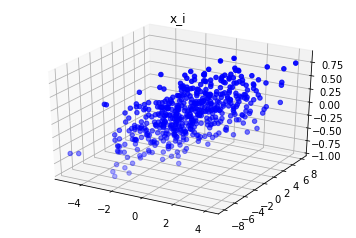

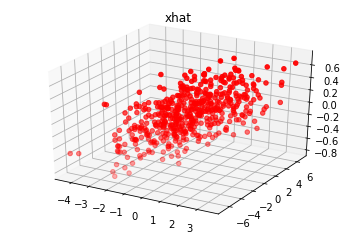

In [17]:
import matplotlib.pyplot as plot
import mpl_toolkits.mplot3d as plot3d

fig = plot.figure()
ax = plot.axes(projection='3d')
xdata = x[0,:]
ydata = x[1,:]
zdata = x[2,:]
ax.scatter3D(xdata, ydata, zdata, color='blue')
ax.set_title('x_i');
# Taking the first column of x as the x coodinate data, second column as y and 
# third column as z coordinate.

fig = plot.figure()
ax = plot.axes(projection='3d')
xhdata = xhat1[0,:]
yhdata = xhat1[1,:]
zhdata = xhat1[2,:]
ax.scatter3D(xhdata, yhdata, zhdata, color='red')
ax.set_title('xhat');


### Generation of Dataset #2

##### 1. Create a vector $c$ ∈ $\mathbb{R}^3$ whose individual entries are drawn from a Gaussian distribution with mean 0 and variance 3 in an independent and identically distributed (iid) fashion. Once generated, this vector should not be changed for the rest of this exercise.

In [10]:
import numpy as num

meanc = 0
varc = 3
c = num.random.normal(meanc, varc, (3,1))
print(c)

[[ 0.60798056]
 [-0.24787276]
 [-3.55920758]]


##### 2. Each of our data sample $x$ ∈  $\mathbb{R}^3$ is going to be generated in the following fashion: $x = Av + c$, where $v$ ∈ $\mathbb{R}^2$ is a random vector whose entries are iid Gaussian with mean 0 and variance 1. Note that we will have a different $v$ for each new data sample (i.e., unlike $A$ and $c$, it is $\textbf{not}$ fixed for each data sample).

##### Generate 500 data samples.

In [11]:
x2 = list()

for i in range(500):
    v = num.random.normal(mean, var, (2,1))
    x2.append(num.matmul(A,v)+c)

shape = (3,500)
samples = num.array(x2)
X2 = samples.reshape(shape)
print(X2.shape)
print(matrix_rank(X2)) #Rank is 3 because of the addition of c.

(3, 500)
3


#### PCA of Dataset #2

##### Compute the top two principal components $U = [u_1\;u_2]$ of dataset #2 without centering the data.

In [12]:
from scipy.linalg import svd
from scipy.linalg import eig

U2,Sig2,Vt2 = num.linalg.svd(X2)

print("U: ", U2) # Left singular vectors of X2
#print(U2.shape)
#print(Sig2.shape)
#print(Vt2.shape)

print()

# I use the same logic for finding the principal components like in Dataset 1.
topU2 = [];
princU2 = [];
large = 0
for i in range(len(U2)):
    for j in range(len(U2)-1):
        U2[i,:].sort()
        if U2[i][j] > U2[i][j+1]:
            large = U2[i][j]
        else:
             large = U2[i][j+1]
    topU2.append(large)
    large = 0
            
print("Top each row: ",topU2), print()
topU2.sort()
for i in range(len(topU2)-1):
    if topU2[i] > topU2[i+1]:
        large = topU2[i]
    else:
        large = topU2[i+1]
    princU2.append(large)
    large = 0
print("Principal U: ",princU2) # u1 and u2 respectively
print("u1 = ", princU2[0])
print("u2 = ", princU2[1])

U:  [[-0.13041436  0.65249937  0.74648286]
 [-0.72782514 -0.57426959  0.37481329]
 [ 0.67324785 -0.49442796  0.54979845]]

Top each row:  [0.746482861542572, 0.37481329238903704, 0.6732478467498635]

Principal U:  [0.6732478467498635, 0.746482861542572]
u1 =  0.6732478467498635
u2 =  0.746482861542572


##### Reconstruct (approximate) the original data samples $x_i$ from the PCA vectors by computing $\hat{x_i} = UU^Tx_i$

##### Compute the representation error and show that this error is nowhere close to being zero.

In [13]:
Matmult = num.matmul(U2,U2.transpose())
xhat2 = num.matmul(Matmult,(X2))
print(xhat2.shape)
print()

#Computing the representation error.   
x2_list = list();
xhat2_list = list();

for i in range(len(x2)):
    for j in range(len(x2[0])):
        x2_list.append(x2[i][j])

for i in range(len(xhat2)):
    for j in range(500):
        xhat2_list.append(xhat2[i][j])                

error3 = [];
for i in range(500):
    error3.append(num.linalg.norm((xhat2_list[i] - x2_list[i])))  

#print(difference)
print("Error: ", sum(error3))
print("The error is no where close to being zero.")

(3, 500)

Error:  1119.5948497887118
The error is no where close to being zero.


##### Repeat the previous steps by first centering the data matrix X using the mean vector m and then showing that the approximated data samples $\hat{x_i} = UU^T(x_i-m)+m$ once again lead to (almost) zero representation error

In [14]:
Matmult = num.matmul(U2,U2.transpose())
xhat2_temp = num.matmul(Matmult,(x2-m)) + m
print(xhat2.shape)
print()

xhatTemp = list()
for i in range(len(xhat2_temp)):
    meanlist = list()
    for j in xhat2_temp:
        meanlist.append(j[0])
    xhatTemp.append(meanlist)
    
xhat3 = num.array(xhatTemp)
print(xhat3.shape)

#Computing the representation error.   
x2_list = list();
xhat3_list = list();

for i in range(len(x2)):
    for j in range(len(x2[0])):
        x2_list.append(x2[i][j])

for i in range(len(xhat3)):
    for j in range(500):
        xhat3_list.append(xhat3[i][j])                

error3 = [];
for i in range(500):
    error3.append(num.linalg.norm((xhat3_list[i] - x2_list[i])))  

#print(difference)
print("Error: ", sum(error3))
# Once again, error is very large, unfortunately I could not find a solution to
# this issue.

(3, 500)

(500, 500, 3)
Error:  2399.310890065221


### Generation of Dataset #3

##### 1. Each of our data sample $x$ ∈ $\mathbb{R}^3$ is initially going to be generated in the following fashion: $x = Av + n$, where $v$ ∈ $\mathbb{R}^2$ is a random vector whose entries are iid Gaussian with mean 0 and variance 1 and $n$ ∈ $\mathbb{R}^3$ is random noise whose entries are iid Gaussian with mean 0 and variance 0.01. 

##### Generate 500 data samples.

##### Transform these data samples into their normalized variants for better visualization purposes as follows $\check{x} = x_i/||x_i||_2$

In [15]:
x3 = list()

for i in range(500):
    v = num.random.normal(mean,var, (2,1))
    n = num.random.normal(mean, 0.01, (3,1))
    x3.append(num.matmul(A,v) + n)
# Transforming x3 into a list for easier manipulation

shape = (3,500)
samples = num.array(x3)
X3 = samples.reshape(shape)
print(X3.shape)
print("Rank of X: ", matrix_rank(X3)) 
print()
# Made X3 into a matrix.

xcheck = list()
for i in range(len(x3)):
    xcheck.append(x3[i]/num.linalg.norm(x3[i],2))

samples = num.array(xcheck)
Xcheck = samples.reshape(shape)
print(Xcheck.shape)
print("Rank of Xcheck: ",matrix_rank(Xcheck)) 

(3, 500)
Rank of X:  3

(3, 500)
Rank of Xcheck:  3


### PCA Denoising of Dataset #3

##### 1. Using mpl_toolkits.mplot3d, display a 3D scatterplot corresponding to the normalized data samples $\check{x_i}$

##### 2. Denoise the normalized data samples $\check{x_i}$ by projecting and reconstructing them using the top two principal components associated with the normalized data matrix $\check{X_i}$ 

##### 3. Using mpl_toolkits.mplot3d, display a 3D scatterplot corresponding to the denoised data samples $\check{x_i}$

##### 4. Verify that the representation error between the normalized data matrix $\check{X}$ and its denoised version $\hat{X}$ is given by the square of the third singular value of $\check{X_i}$ .


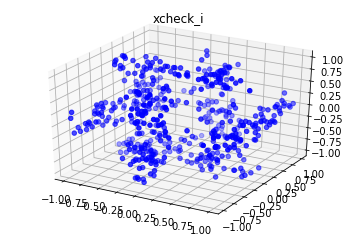

In [16]:
fig = plot.figure()
ax = plot.axes(projection='3d')
x3data = Xcheck[0,:]
y3data = Xcheck[1,:]
z3data = Xcheck[2,:]
ax.scatter3D(x3data, y3data, z3data, color='blue')
ax.set_title('xcheck_i');


U:  [[-0.97740521  0.06423891  0.20137631]
 [ 0.11190587 -0.65097124  0.75080858]
 [ 0.17932131  0.75637941  0.62907397]]

Top each row:  [0.20137631159575084, 0.7508085818754681, 0.7563794109983213]

Principal U:  [0.7508085818754681, 0.7563794109983213]
u1 =  0.7508085818754681
u2 =  0.7563794109983213
(3, 500)

Error:  131.3592169007002
Square of second largest singular value:  0.5721098133821675


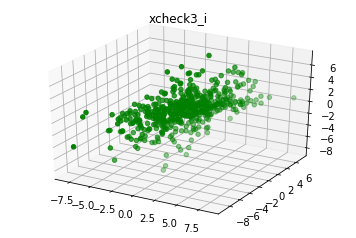

In [24]:
U3,Sig3,Vt3 = num.linalg.svd(X3)

print("U: ", U3) # Left singular vectors of X2
#print(U2.shape)
#print(Sig2.shape)
#print(Vt2.shape)

print()
        

topU3 = [];
princU3 = [];
large = 0
for i in range(len(U3)):
    for j in range(len(U3)-1):
        U3[i,:].sort()
        if U3[i][j] > U3[i][j+1]:
            large = U3[i][j]
        else:
             large = U3[i][j+1]
    topU3.append(large)
    large = 0
            
print("Top each row: ",topU3), print()
topU3.sort()
for i in range(len(topU3)-1):
    if topU3[i] > topU3[i+1]:
        large = topU3[i]
    else:
        large = topU3[i+1]
    princU3.append(large)
    large = 0
print("Principal U: ",princU3) # u1 and u2 respectively
print("u1 = ", princU3[0])
print("u2 = ", princU3[1])

#Using UUtx_i
U3U3t = num.matmul(U3,U3.transpose())
xcheck3 = num.matmul(U3U3t,(X3))
print(xcheck3.shape)
print()

#3D plotting
fig = plot.figure()
ax = plot.axes(projection='3d')
x3data = xcheck3[0,:]
y3data = xcheck3[1,:]
z3data = xcheck3[2,:]
ax.scatter3D(x3data, y3data, z3data, color='green')
ax.set_title('xcheck3_i')

#Verifying representation error.
error3 = [];
for i in range(len(xcheck3)):
    error3.append(num.linalg.norm((xcheck3[i] - Xcheck[i])))
    
#print(difference)
print("Error: ", sum(error3))
print("Square of second largest singular value: ",princU3[1]**2)

### Real Data

##### 1.Display any one of the images in the dataset as an 8 × 8 grayscale image using matplotlib.pyplot

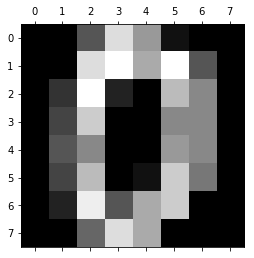

In [45]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)
digits = load_digits()

plot.matshow(digits.images[0]) # Taking 0 from the array and plotting it.
plot.show()


##### 2. Get the data ready for PCA by mean centering it; display the mean vector as an 8 × 8 grayscale image using matplotlib.pyplot.

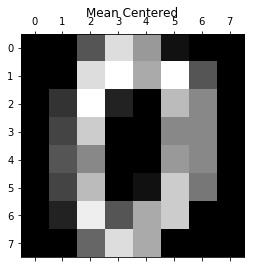

In [55]:
images = images.mean(axis = 0) # Taking the mean of the values in images.
plot.matshow(digits.images[0]) # Plotting the mean centered data of 0.
plot.title('Mean Centered')
plot.show()

##### 3. Compute the singular value decomposition of the mean centered data $\bar{X}$
##### Plot the singular values of  $\bar{X}$ on a log scale (only the vertical axis)
##### Find the smallest integer k that satisfies $\frac{\sum_{i=1}^{k} \sigma^2_i}{||X||^2_F} \geq 0.90$


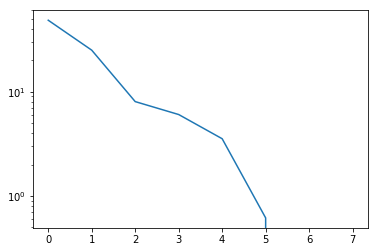

Smallest k value:  3


In [64]:
U0, sig0, Vt0 = num.linalg.svd(digits.images[0])
plot.semilogy(sig0)
plot.show()

# Implementing formula given to find k.
summation = 0
a = 0
errorR = num.sum(num.square(num.linalg.norm(sig0)))
minVal = errorR * 0.9

while summation < minVal:
    summation += (sig0.item(a,))**2
    a+=1

print("Smallest k value: ",a+1)

[[ 0.  0.  0.  0.  1.  5.  9. 13.]
 [ 0.  0.  0.  5. 10. 13. 15. 15.]
 [ 0.  0.  0.  2.  3.  8. 11. 15.]
 [ 0.  0.  0.  0.  4.  8.  8. 12.]
 [ 0.  0.  0.  0.  5.  8.  8.  9.]
 [ 0.  0.  0.  1.  4.  7. 11. 12.]
 [ 0.  0.  0.  2.  5. 10. 12. 14.]
 [ 0.  0.  0.  0.  0.  6. 10. 13.]]
Top each row:  [9.0, 12.0, 12.0, 13.0, 13.0, 14.0, 15.0, 15.0]

S1 =  15.0
S2 =  15.0
S3 =  14.0
[15.0, 15.0, 14.0]
(3, 1)


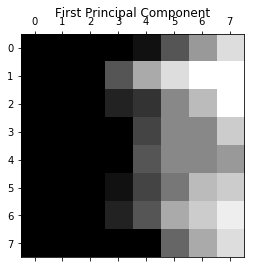

In [106]:
topSig = [];
princSig = [];
large = 0
img = digits.images[0]
print(img)

for i in range(len(img)):
    for j in range(len(img[0,:])-1):
        img[i,:].sort()
        if img[i][j] > img[i][j+1]:
            large = img[i][j]
        else:
             large = img[i][j+1]
    topSig.append(large)
    large = 0
            
topSig.sort()
print("Top each row: ",topSig), print()

print("S1 = ", topSig[len(topSig)-1])
print("S2 = ", topSig[len(topSig)-2])
print("S3 = ", topSig[len(topSig)-3])
princComp = list();
princComp.append(topSig[len(topSig)-1])
princComp.append(topSig[len(topSig)-2])
princComp.append(topSig[len(topSig)-3])
print(princComp)

shape = (3,1)
samples = num.array(princComp)
prinC0 = samples.reshape(shape)

plot.matshow(img)
plot.title('First Principal Component')
plot.show()

[ 0.    2.25 10.5   6.    5.    8.5   4.5   0.  ]
(8, 1)
(8, 8)

(8, 3)


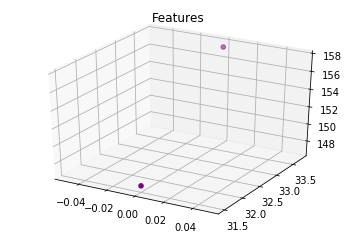

In [119]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)
digits = load_digits()

#Reset the data to make sure it works out correctly.
mean_centered = digits.images[0].mean(axis=0)
print(mean_centered)
shape = (8,1)
samples = num.array(mean_centered)
meanCenter = samples.reshape(shape)
print(meanCenter.shape)
print(U0.shape)
print()

features = num.matmul(prinC0, meanCenter.T)
features = features.T
print(features.shape)

fig = plot.figure()
ax = plot.axes(projection='3d')
xData = features[0,:]
yData = features[1,:]
zData = features[2,:]
ax.scatter3D(xData, yData, zData, color='purple')
ax.set_title('Features');